##### list of experiment:
- EXP1: node doubled partition generated
- EXP2: node doubled partition fixed to 10 community
- EXP3: partition doubled graph fixed to 2expnode(n=20480, m=50000).graph

In [78]:
import networkit as nk
import numpy as np
import pandas as pd
import re
from networkit.graphio import BinaryPartitionReader
import matplotlib.pyplot as plt

In [79]:
all_data = pd.read_csv("../results/time.csv", sep=";")
all_data

,Code,Graph,Partition,Flag,Community computation,Nodes computation,GLR computation,Total
0,python,"2expnode(n=5120, m=50000).graph",NaN,2expnode,0.249632,0.810747,19.468141,19.469360
1,python,"2expnode(n=10240, m=50000).graph",NaN,2expnode,0.457549,2.529974,66.076160,66.081450
2,python,"2expnode(n=640, m=50000).graph",NaN,2expnode,0.020755,0.051101,1.059860,1.060017
3,python,"2expnode(n=40960, m=50000).graph",NaN,2expnode,0.757963,20.458904,593.701867,593.732502
4,python,"2expnode(n=2560, m=50000).graph",NaN,2expnode,0.021359,0.394145,7.887121,7.887537
5,python,"2expnode(n=1280, m=50000).graph",NaN,2expnode,0.054334,0.224641,1.643777,1.644040
6,python,"2expnode(n=20480, m=50000).graph",NaN,2expnode,0.588773,7.666712,180.451038,180.457450
7,C++,"2expnode(n=5120, m=50000).graph",NaN,2expnode,0.090647,0.366563,28.803762,28.804764
8,C++,"2expnode(n=10240, m=50000).graph",NaN,2expnode,0.172034,0.634378,92.471686,92.473924
9,C++,"2expnode(n=640, m=50000).graph",NaN,2expnode,0.011232,0.046830,1.276260,1.276348


In [80]:
pattern = r"n=(\d+),\s*m=(\d+)"
all_data["n"] = all_data['Graph'].apply(lambda graph_name: int(re.search(pattern, graph_name).group(1)))
all_data["m"] = all_data['Graph'].apply(lambda graph_name: int(re.search(pattern, graph_name).group(2)))

In [81]:
all_data["deltaNodesComputation"] = all_data["Nodes computation"] - all_data["Community computation"]
all_data["deltaGLR"] = all_data["GLR computation"] - all_data["Nodes computation"]

In [82]:
programming_language = "python"

##### Utility function

In [83]:
def plot_column(df, column_names, num_row=1, num_colum=1, one_ax=False, figsize=(20,8)):
    if one_ax:
        _, axes = plt.subplots(1, 1, figsize=figsize)
    else:
        _, axes = plt.subplots(num_row, num_colum, figsize=figsize)
    for i in range(len(column_names)):
        ax=axes 
        column_name = column_names[i]
        if (num_row, num_colum) != (1,1) and not one_ax:
           ax = axes[i] 
        if not one_ax:
            ax.set_ylabel(column_name)
        df[column_name].plot(marker="o", ax=ax, label=column_name)
    if one_ax:
         axes.legend()
    plt.show()

# Programming Language Comparison (EXP1)

##### Filter results

In [84]:
all_comparison = all_data[ all_data["Flag"] == "2expnode"]

In [85]:
py_comparison = all_comparison[ all_comparison["Code"] == "python"]
py_comparison = py_comparison.drop(columns=["Code", "m"])
cpp_comparison = all_comparison[ all_comparison["Code"] == "C++"]
cpp_comparison = cpp_comparison.drop(columns=["Code", "m"])

comparison = pd.merge(py_comparison, cpp_comparison, how="inner", on=["n", "Graph", "Partition", "Flag"], suffixes=("_py", "_cpp"))
comparison

,Graph,Partition,Flag,Community computation_py,Nodes computation_py,GLR computation_py,Total_py,n,deltaNodesComputation_py,deltaGLR_py,Community computation_cpp,Nodes computation_cpp,GLR computation_cpp,Total_cpp,deltaNodesComputation_cpp,deltaGLR_cpp
0,"2expnode(n=5120, m=50000).graph",NaN,2expnode,0.249632,0.810747,19.468141,19.469360,5120,0.561116,18.657394,0.090647,0.366563,28.803762,28.804764,0.275916,28.437199
1,"2expnode(n=10240, m=50000).graph",NaN,2expnode,0.457549,2.529974,66.076160,66.081450,10240,2.072425,63.546186,0.172034,0.634378,92.471686,92.473924,0.462344,91.837308
2,"2expnode(n=640, m=50000).graph",NaN,2expnode,0.020755,0.051101,1.059860,1.060017,640,0.030346,1.008759,0.011232,0.046830,1.276260,1.276348,0.035598,1.229430
3,"2expnode(n=40960, m=50000).graph",NaN,2expnode,0.757963,20.458904,593.701867,593.732502,40960,19.700940,573.242964,0.386909,4.343140,648.247755,648.258891,3.956231,643.904615
4,"2expnode(n=2560, m=50000).graph",NaN,2expnode,0.021359,0.394145,7.887121,7.887537,2560,0.372787,7.492976,0.057544,0.142087,9.485665,9.486185,0.084543,9.343578
5,"2expnode(n=1280, m=50000).graph",NaN,2expnode,0.054334,0.224641,1.643777,1.644040,1280,0.170307,1.419136,0.035937,0.094207,1.564179,1.564362,0.058270,1.469972
6,"2expnode(n=20480, m=50000).graph",NaN,2expnode,0.588773,7.666712,180.451038,180.457450,20480,7.077939,172.784326,0.265604,1.385899,349.597689,349.602380,1.120295,348.211790


##### Set number of nodes as ID

In [86]:
comparison.set_index("n", inplace=True)
comparison.sort_index(inplace=True)

##### Compare total time

In [87]:
comparison.filter(regex='Total')

,Total_py,Total_cpp
n,,
640,1.060017,1.276348
1280,1.644040,1.564362
2560,7.887537,9.486185
5120,19.469360,28.804764
10240,66.081450,92.473924
20480,180.457450,349.602380
40960,593.732502,648.258891


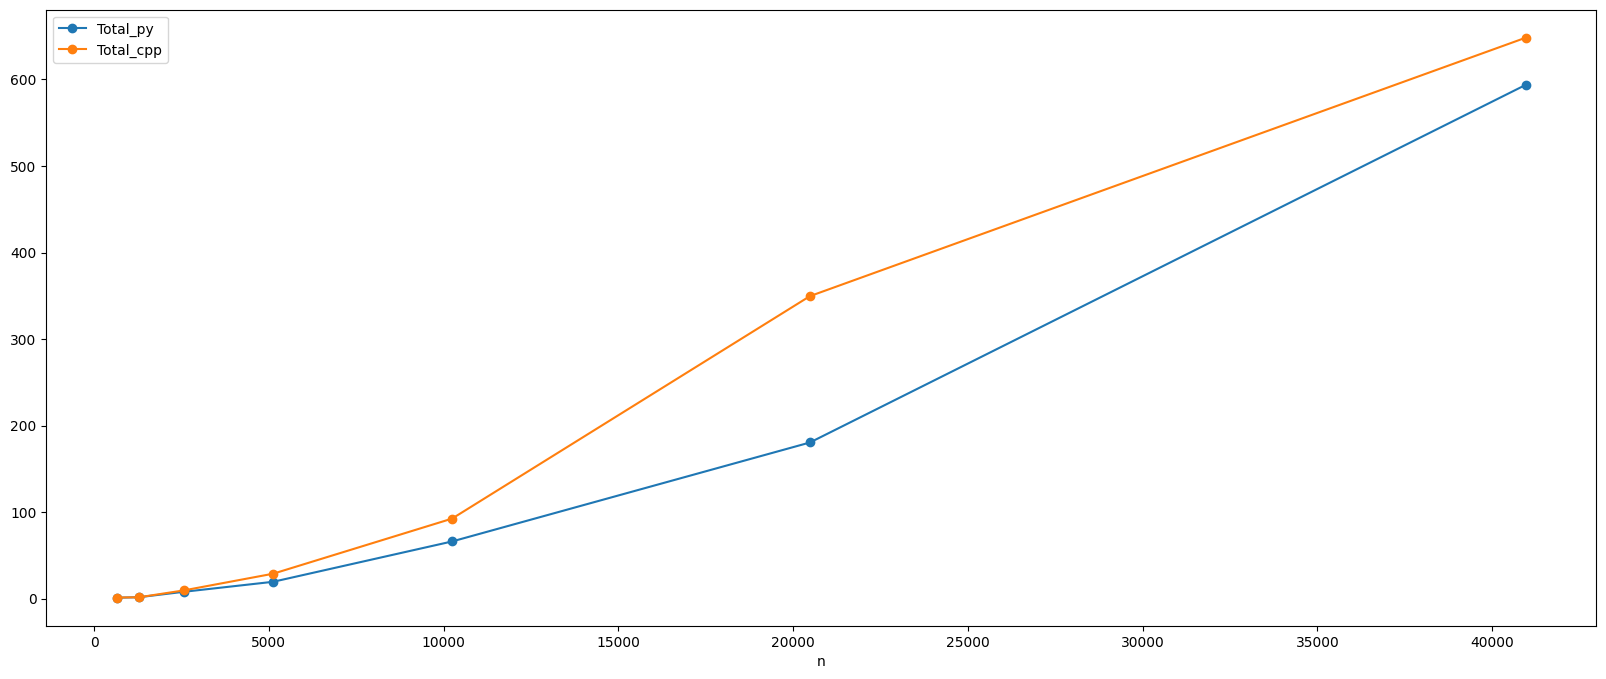

In [88]:
plot_column(comparison, ['Total_py', 'Total_cpp'], one_ax=True)

##### Compare partitionsComputation

In [89]:
comparison.filter(regex="Community computation")

,Community computation_py,Community computation_cpp
n,,
640,0.020755,0.011232
1280,0.054334,0.035937
2560,0.021359,0.057544
5120,0.249632,0.090647
10240,0.457549,0.172034
20480,0.588773,0.265604
40960,0.757963,0.386909


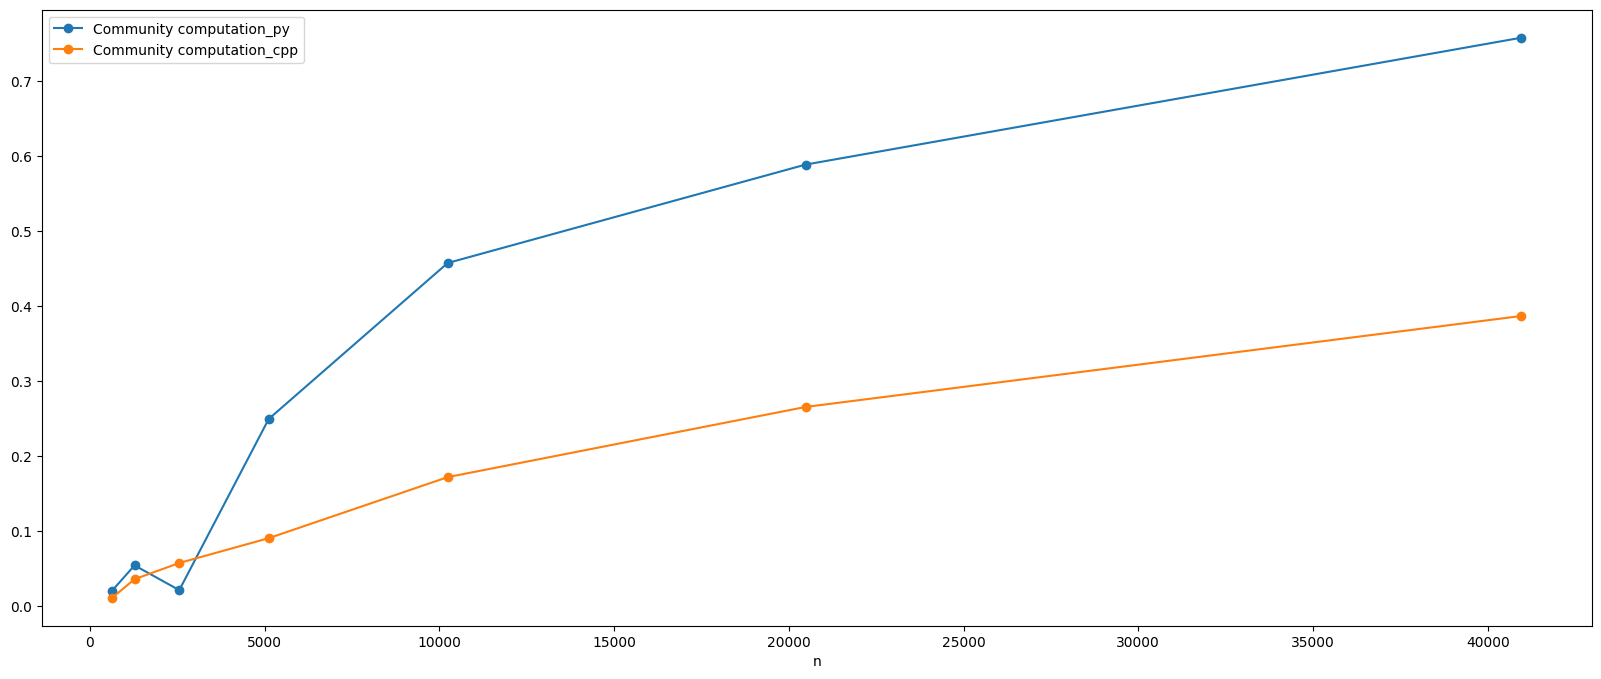

In [90]:
plot_column(comparison, ['Community computation_py', 'Community computation_cpp'], one_ax=True)

##### Compare nodesComputation

In [91]:
comparison.filter(regex="deltaNodesComputation")

,deltaNodesComputation_py,deltaNodesComputation_cpp
n,,
640,0.030346,0.035598
1280,0.170307,0.058270
2560,0.372787,0.084543
5120,0.561116,0.275916
10240,2.072425,0.462344
20480,7.077939,1.120295
40960,19.700940,3.956231


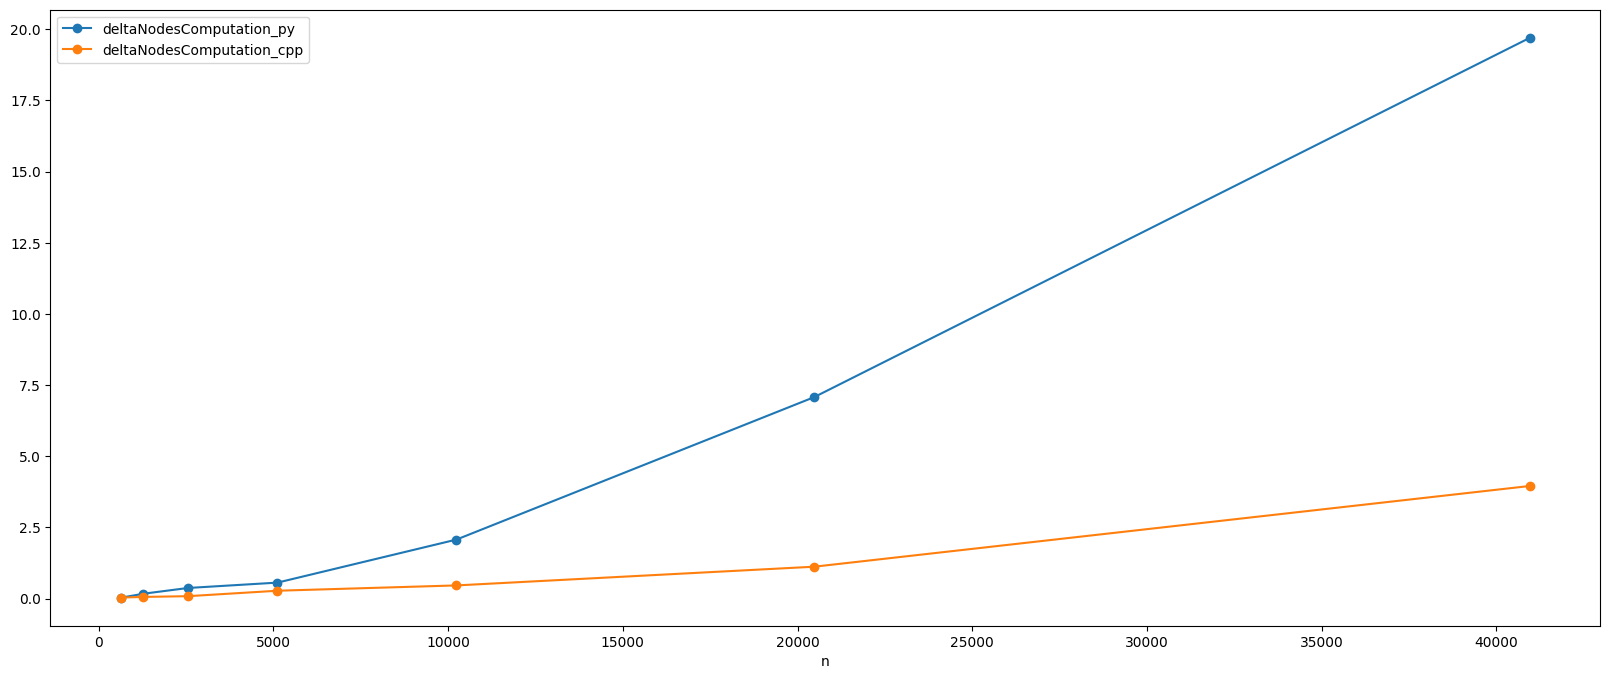

In [92]:
plot_column(comparison, ['deltaNodesComputation_py', 'deltaNodesComputation_cpp'], one_ax=True)

##### Compare deltaGLR

In [93]:
comparison.filter(regex="deltaGLR")

,deltaGLR_py,deltaGLR_cpp
n,,
640,1.008759,1.229430
1280,1.419136,1.469972
2560,7.492976,9.343578
5120,18.657394,28.437199
10240,63.546186,91.837308
20480,172.784326,348.211790
40960,573.242964,643.904615


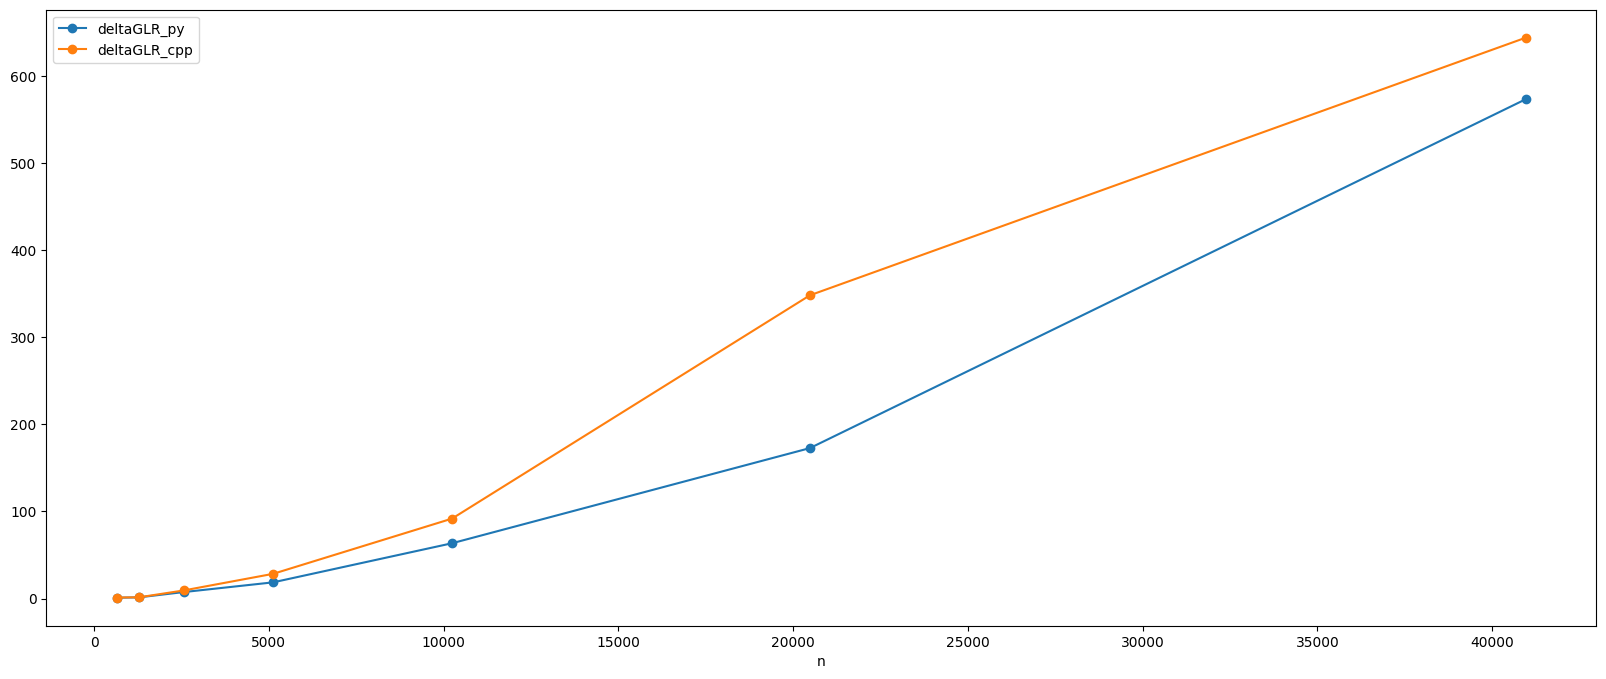

In [94]:
plot_column(comparison, ['deltaGLR_py', 'deltaGLR_cpp'], one_ax=True)

# Double Experiment (EXP1)

##### Filter results

In [95]:
dexpnode = all_data[ all_data["Flag"] == "2expnode"]
dexpnode = dexpnode[dexpnode["Code"] == programming_language]

##### Set number of nodes as ID

In [96]:
dexpnode.set_index("n", inplace=True)
dexpnode.sort_index(inplace=True)

##### Show total time

In [97]:
dexpnode[["Total"]]

,Total
n,
640,1.060017
1280,1.644040
2560,7.887537
5120,19.469360
10240,66.081450
20480,180.457450
40960,593.732502


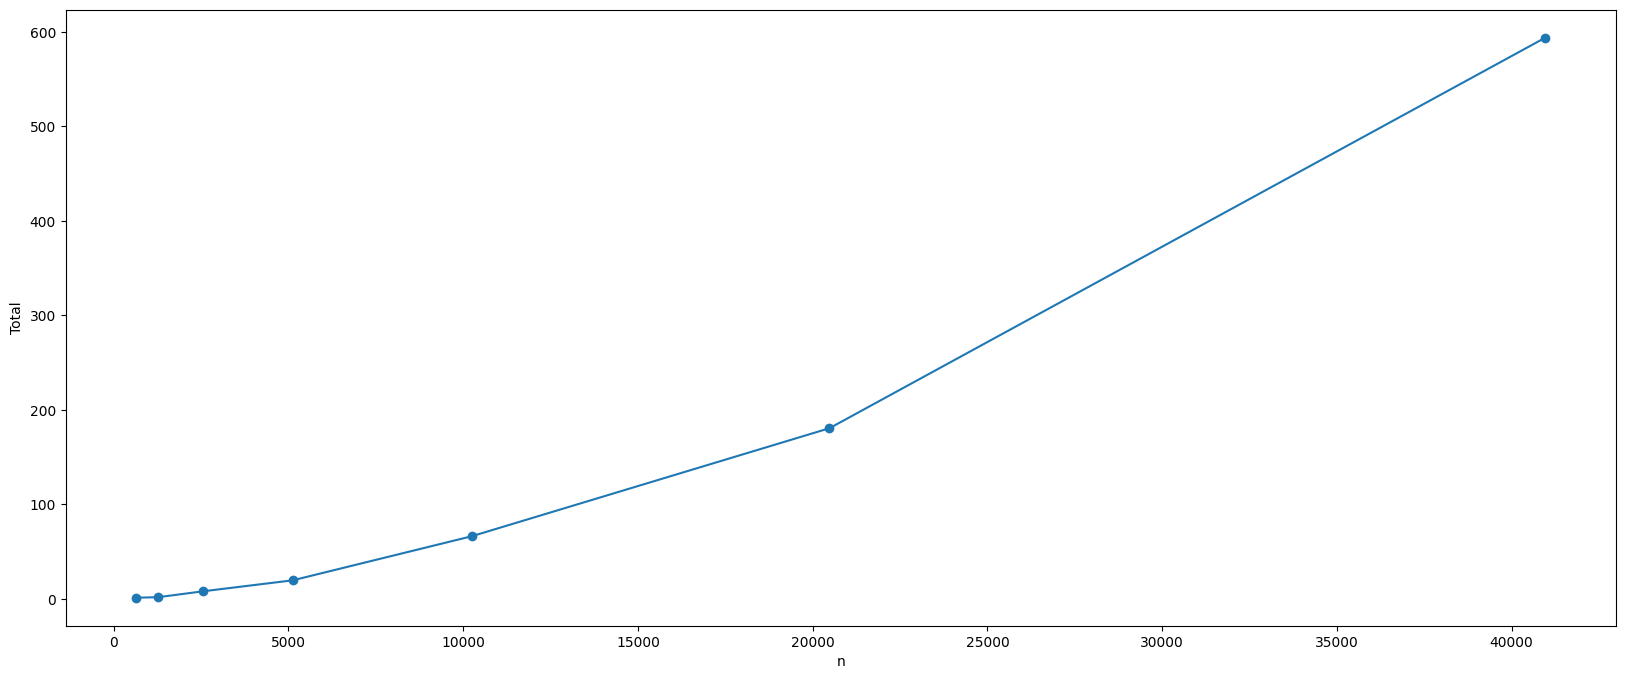

In [98]:
plot_column(dexpnode, ["Total"])

##### Show partitionsComputation

In [99]:
dexpnode[["Community computation"]]

,Community computation
n,
640,0.020755
1280,0.054334
2560,0.021359
5120,0.249632
10240,0.457549
20480,0.588773
40960,0.757963


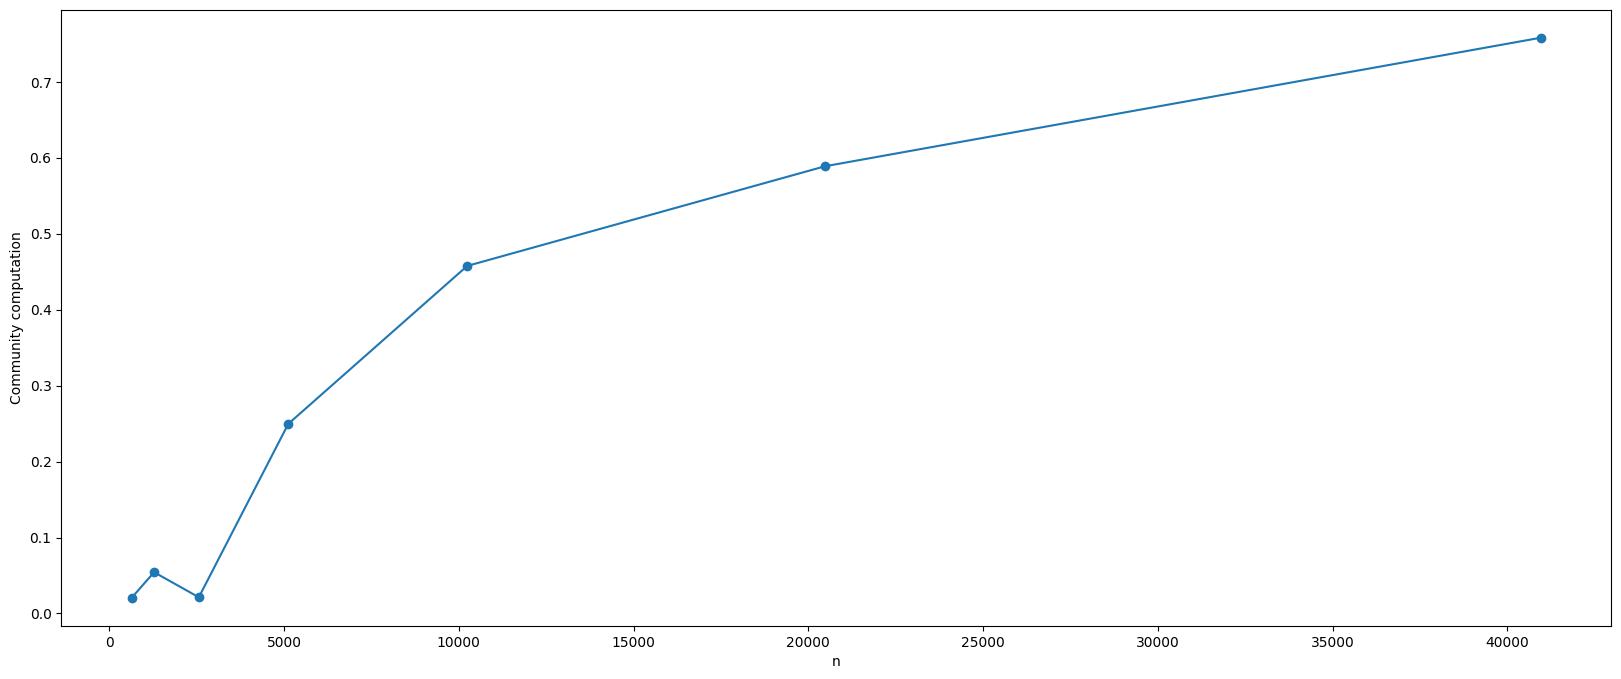

In [100]:
plot_column(dexpnode, ["Community computation"])

##### Show nodesComputation

In [101]:
dexpnode[["deltaNodesComputation"]]

,deltaNodesComputation
n,
640,0.030346
1280,0.170307
2560,0.372787
5120,0.561116
10240,2.072425
20480,7.077939
40960,19.700940


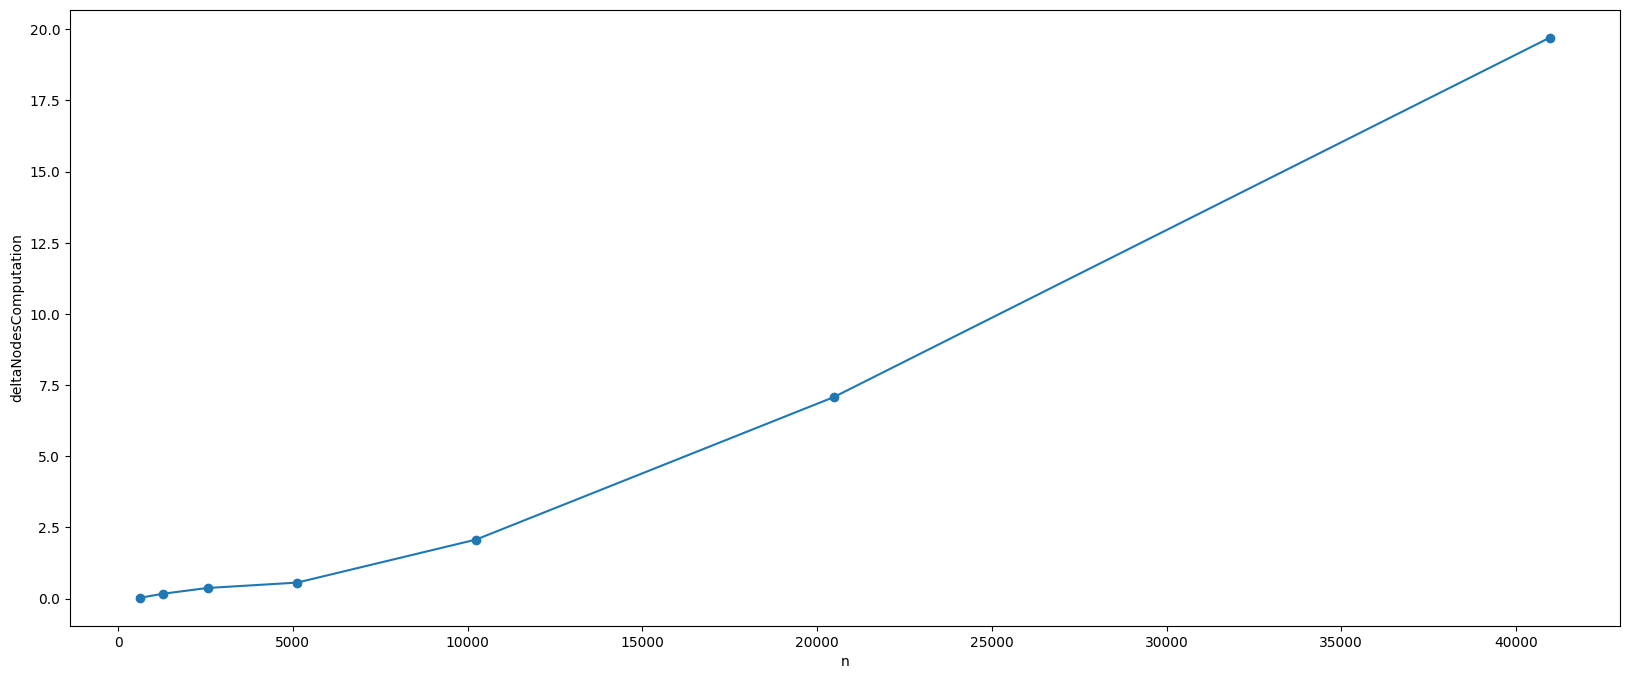

In [102]:
plot_column(dexpnode, ["deltaNodesComputation"])

##### Show deltaGLR

In [103]:
dexpnode[["deltaGLR"]]

,deltaGLR
n,
640,1.008759
1280,1.419136
2560,7.492976
5120,18.657394
10240,63.546186
20480,172.784326
40960,573.242964


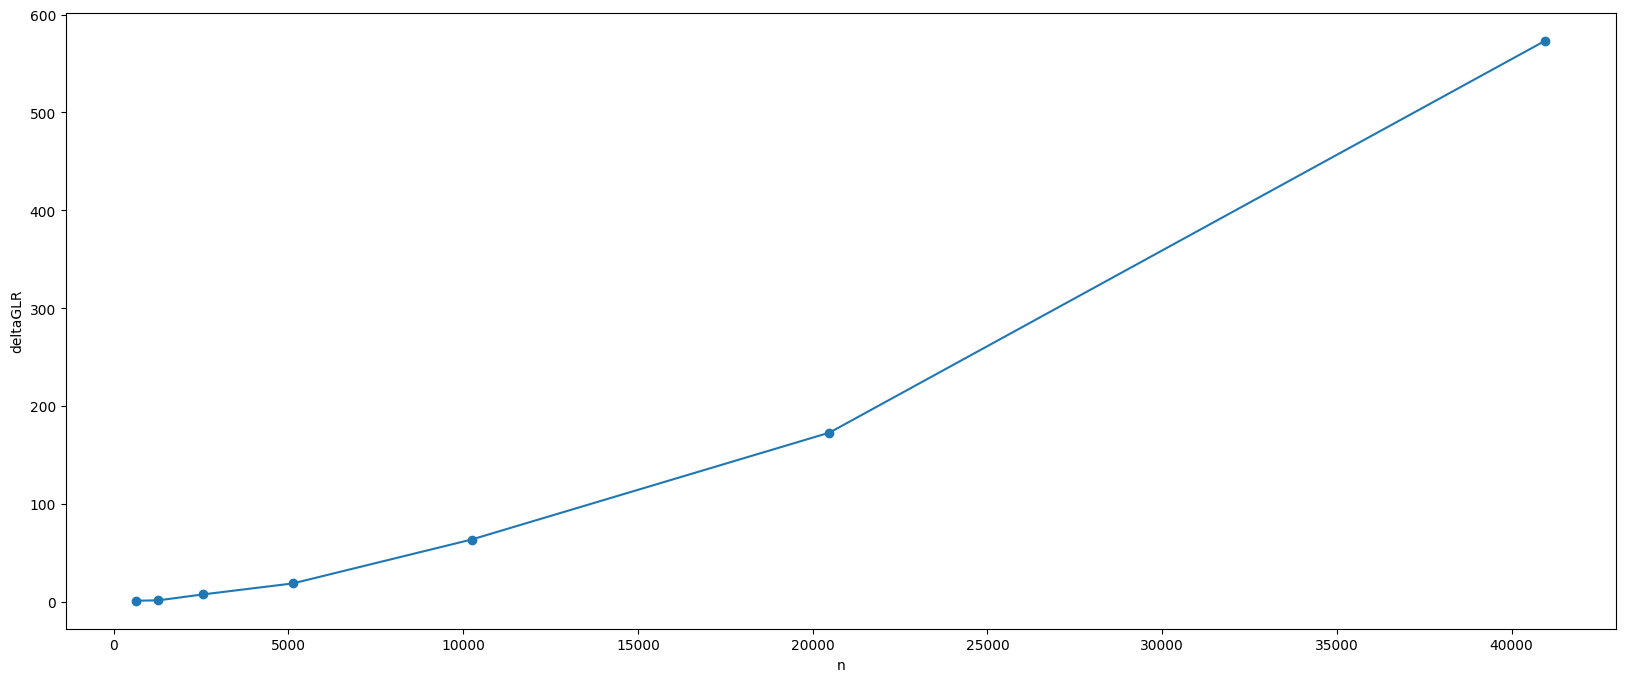

In [104]:
plot_column(dexpnode, ["deltaGLR"])

# Programming Language Comparison (EXP2)

##### Filter results

In [105]:
all_comparison = all_data[ all_data["Flag"] == "2expnode(fixnumbercommunity)"]

In [106]:
py_comparison = all_comparison[ all_comparison["Code"] == "python"]
py_comparison = py_comparison.drop(columns=["Code", "m"])
cpp_comparison = all_comparison[ all_comparison["Code"] == "C++"]
cpp_comparison = cpp_comparison.drop(columns=["Code", "m"])

comparison = pd.merge(py_comparison, cpp_comparison, how="inner", on=["n", "Graph", "Partition", "Flag"], suffixes=("_py", "_cpp"))
comparison

,Graph,Partition,Flag,Community computation_py,Nodes computation_py,GLR computation_py,Total_py,n,deltaNodesComputation_py,deltaGLR_py,Community computation_cpp,Nodes computation_cpp,GLR computation_cpp,Total_cpp,deltaNodesComputation_cpp,deltaGLR_cpp
0,"2expnode(n=5120, m=50000).graph",../partial_results/partitions/partition10//2ex...,2expnode(fixnumbercommunity),0.056638,0.656639,16.195146,16.195926,5120,0.600000,15.538508,0.010687,0.122292,18.889932,18.890725,0.111605,18.767640
1,"2expnode(n=10240, m=50000).graph",../partial_results/partitions/partition10//2ex...,2expnode(fixnumbercommunity),0.076463,0.877427,49.523101,49.524659,10240,0.800964,48.645674,0.012957,0.211121,67.215487,67.217266,0.198164,67.004366
2,"2expnode(n=640, m=50000).graph",../partial_results/partitions/partition10//2ex...,2expnode(fixnumbercommunity),0.013811,0.076439,1.056673,1.056838,640,0.062629,0.980234,0.004539,0.020019,1.040790,1.040871,0.015480,1.020771
3,"2expnode(n=40960, m=50000).graph",../partial_results/partitions/partition10//2ex...,2expnode(fixnumbercommunity),0.071342,7.968201,553.460172,553.484491,40960,7.896858,545.491971,0.034551,3.266895,675.808144,675.816235,3.232344,672.541249
4,"2expnode(n=2560, m=50000).graph",../partial_results/partitions/partition10//2ex...,2expnode(fixnumbercommunity),0.007239,0.393742,7.859056,7.859581,2560,0.386503,7.465314,0.020061,0.110855,8.541427,8.541848,0.090794,8.430572
5,"2expnode(n=1280, m=50000).graph",../partial_results/partitions/partition10//2ex...,2expnode(fixnumbercommunity),0.006699,0.077879,1.516051,1.516336,1280,0.071180,1.438172,0.006231,0.056307,1.462929,1.463108,0.050076,1.406622
6,"2expnode(n=20480, m=50000).graph",../partial_results/partitions/partition10//2ex...,2expnode(fixnumbercommunity),0.033712,2.165051,153.668088,153.671923,20480,2.131339,151.503037,0.034867,0.350966,209.491742,209.495447,0.316099,209.140776


##### Set number of nodes as ID

In [107]:
comparison.set_index("n", inplace=True)
comparison.sort_index(inplace=True)

##### Compare total time

In [108]:
comparison.filter(regex='Total')

,Total_py,Total_cpp
n,,
640,1.056838,1.040871
1280,1.516336,1.463108
2560,7.859581,8.541848
5120,16.195926,18.890725
10240,49.524659,67.217266
20480,153.671923,209.495447
40960,553.484491,675.816235


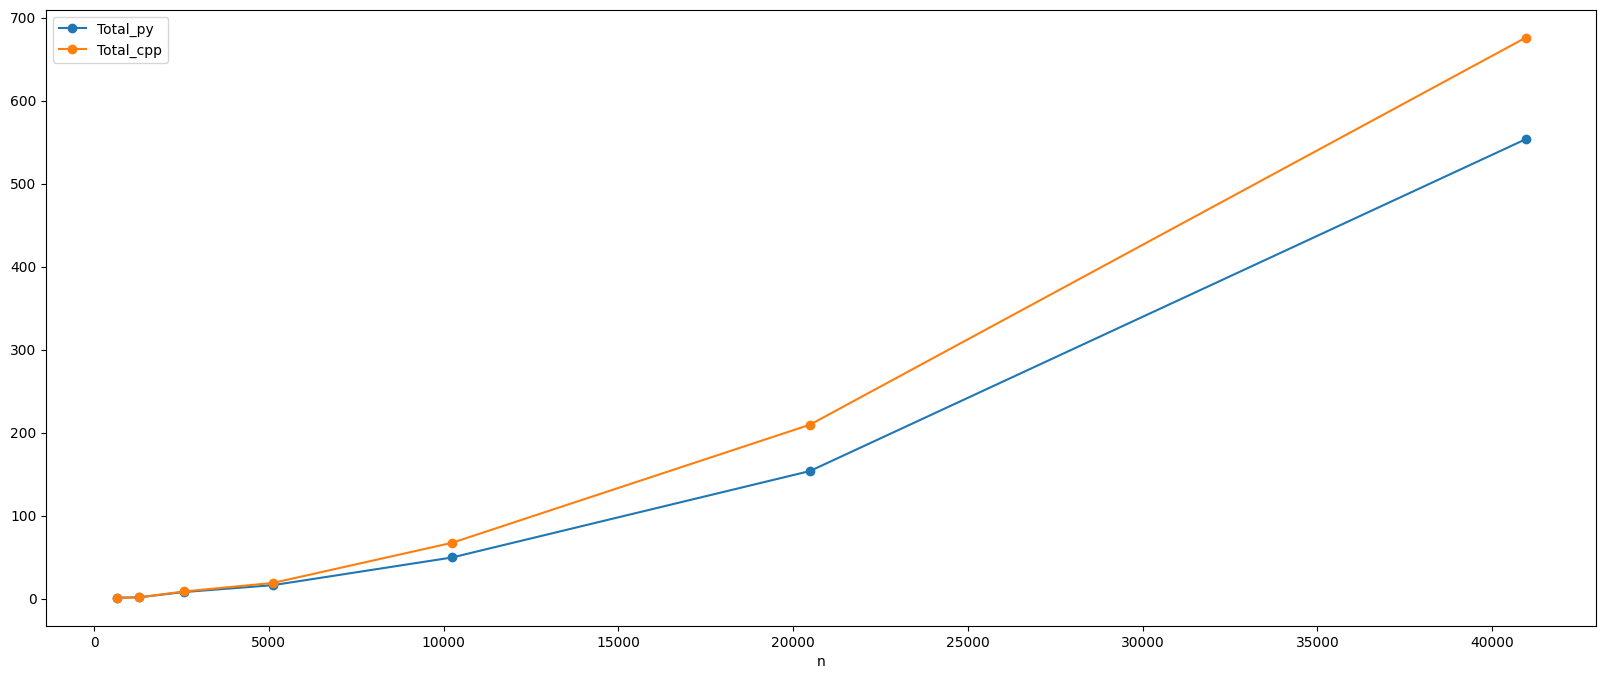

In [109]:
plot_column(comparison, ['Total_py', 'Total_cpp'], one_ax=True)

##### Compare nodesComputation

In [110]:
comparison.filter(regex="deltaNodesComputation")

,deltaNodesComputation_py,deltaNodesComputation_cpp
n,,
640,0.062629,0.015480
1280,0.071180,0.050076
2560,0.386503,0.090794
5120,0.600000,0.111605
10240,0.800964,0.198164
20480,2.131339,0.316099
40960,7.896858,3.232344


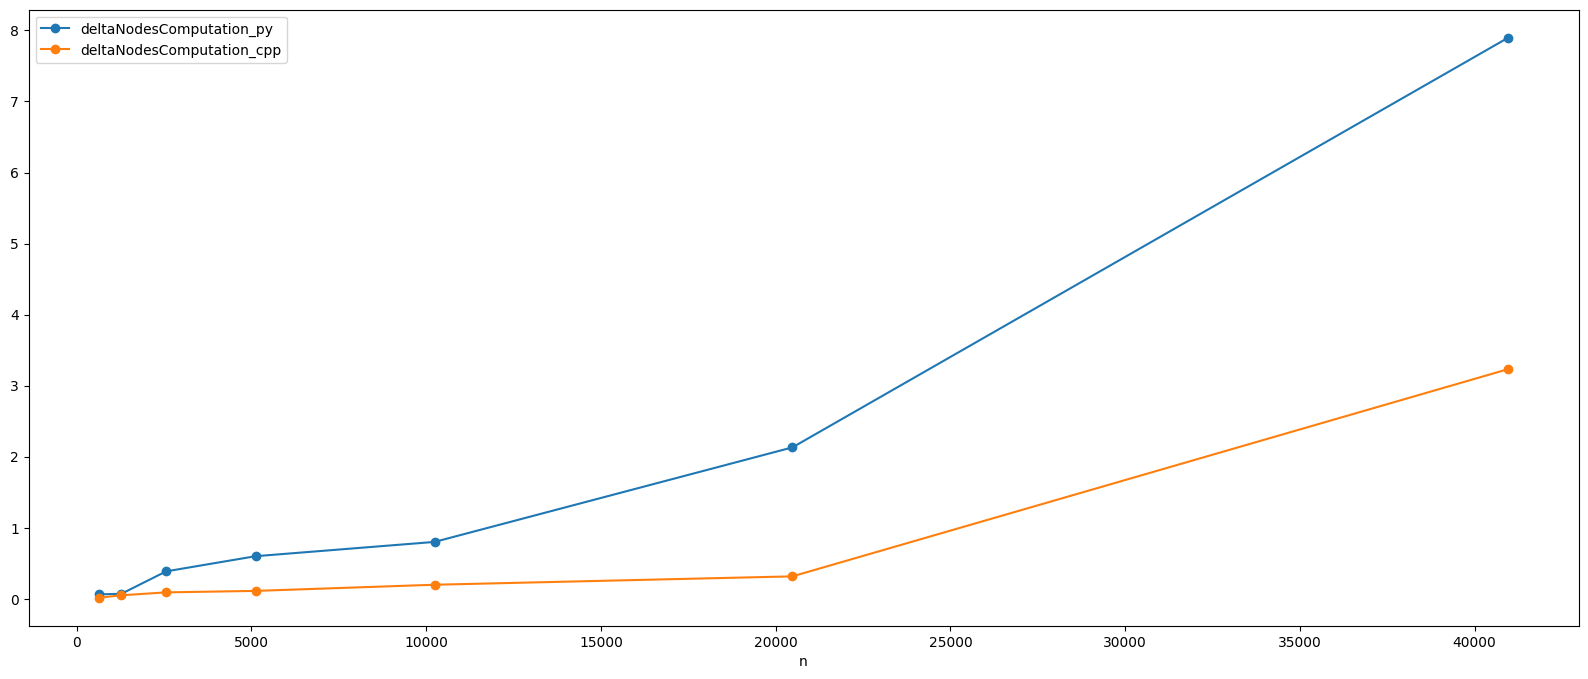

In [111]:
plot_column(comparison, ['deltaNodesComputation_py', 'deltaNodesComputation_cpp'], one_ax=True)

##### Compare deltaGLR

In [112]:
comparison.filter(regex="deltaGLR")

,deltaGLR_py,deltaGLR_cpp
n,,
640,0.980234,1.020771
1280,1.438172,1.406622
2560,7.465314,8.430572
5120,15.538508,18.767640
10240,48.645674,67.004366
20480,151.503037,209.140776
40960,545.491971,672.541249


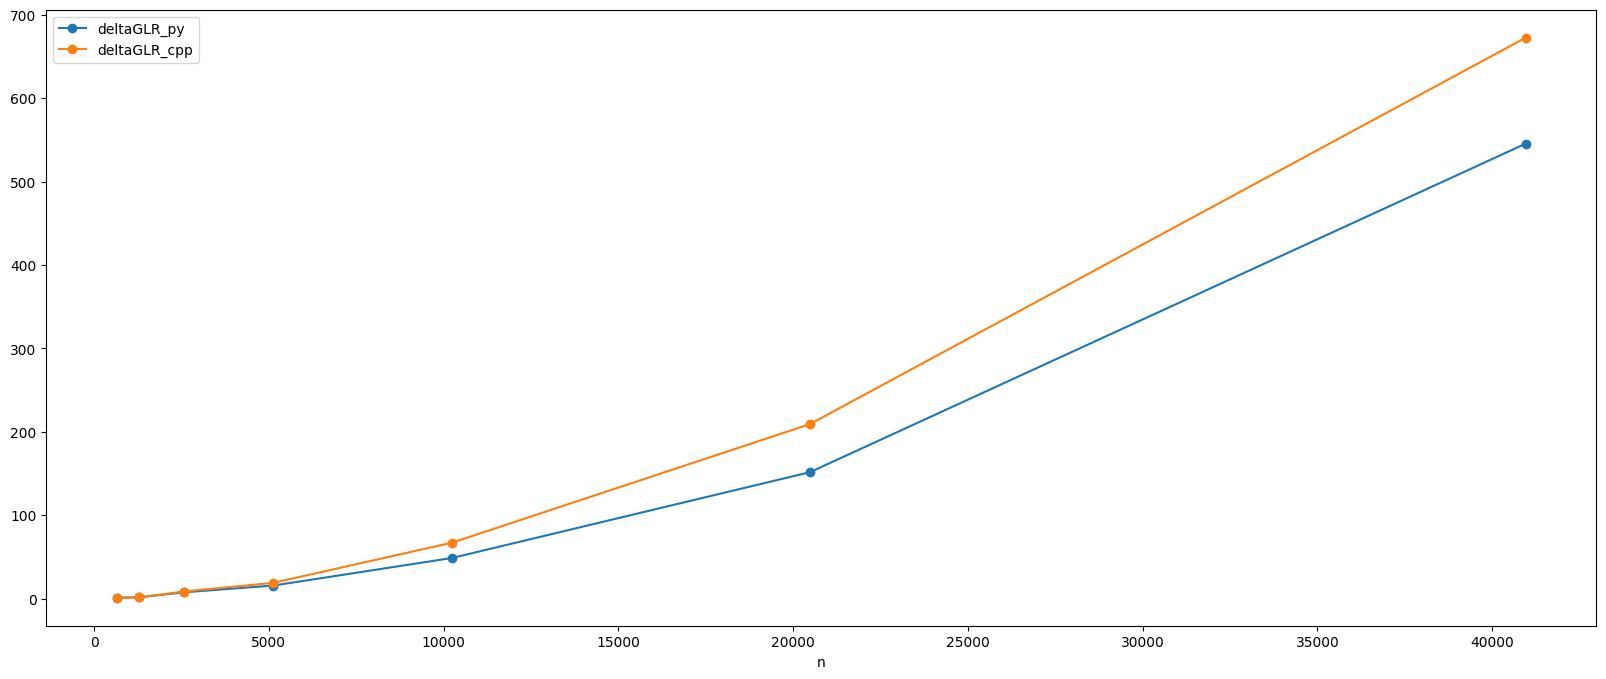

In [113]:
plot_column(comparison, ['deltaGLR_py', 'deltaGLR_cpp'], one_ax=True)

# Double Experiment (EXP2)

##### Filter results

In [114]:
dexpnode_ten = all_data[ all_data["Flag"] == "2expnode(fixnumbercommunity)"]
dexpnode_ten = dexpnode_ten[dexpnode_ten["Code"] == programming_language]

##### Set number of nodes as ID

In [115]:
dexpnode_ten.set_index("n", inplace=True)
dexpnode_ten.sort_index(inplace=True)

##### Show total time

In [116]:
dexpnode_ten[["Total"]]

,Total
n,
640,1.056838
1280,1.516336
2560,7.859581
5120,16.195926
10240,49.524659
20480,153.671923
40960,553.484491


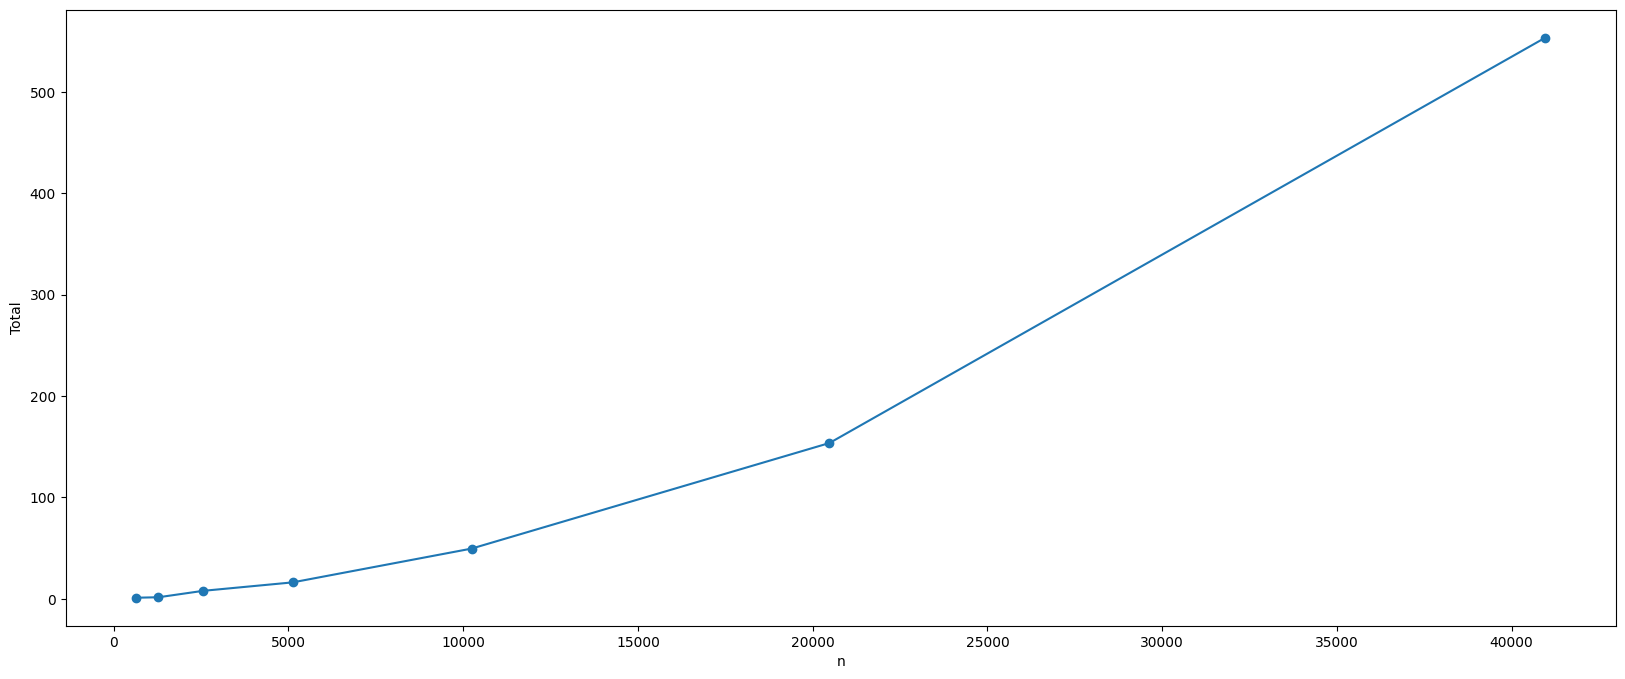

In [117]:
plot_column(dexpnode_ten, ["Total"])

##### Show nodesComputation

In [118]:
dexpnode_ten[["deltaNodesComputation"]]

,deltaNodesComputation
n,
640,0.062629
1280,0.071180
2560,0.386503
5120,0.600000
10240,0.800964
20480,2.131339
40960,7.896858


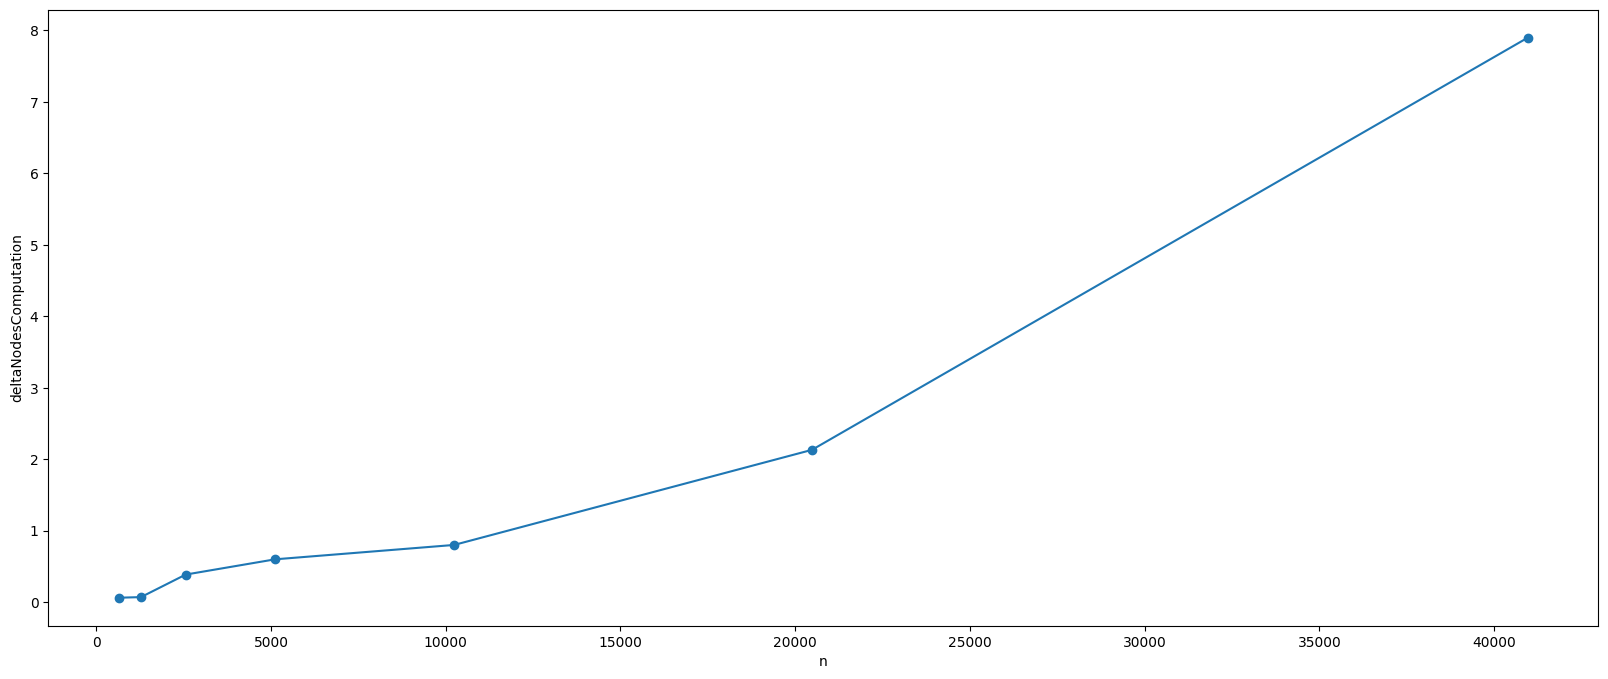

In [119]:
plot_column(dexpnode_ten, ["deltaNodesComputation"])

##### Show deltaGLR

In [120]:
dexpnode_ten[["deltaGLR"]]

,deltaGLR
n,
640,0.980234
1280,1.438172
2560,7.465314
5120,15.538508
10240,48.645674
20480,151.503037
40960,545.491971


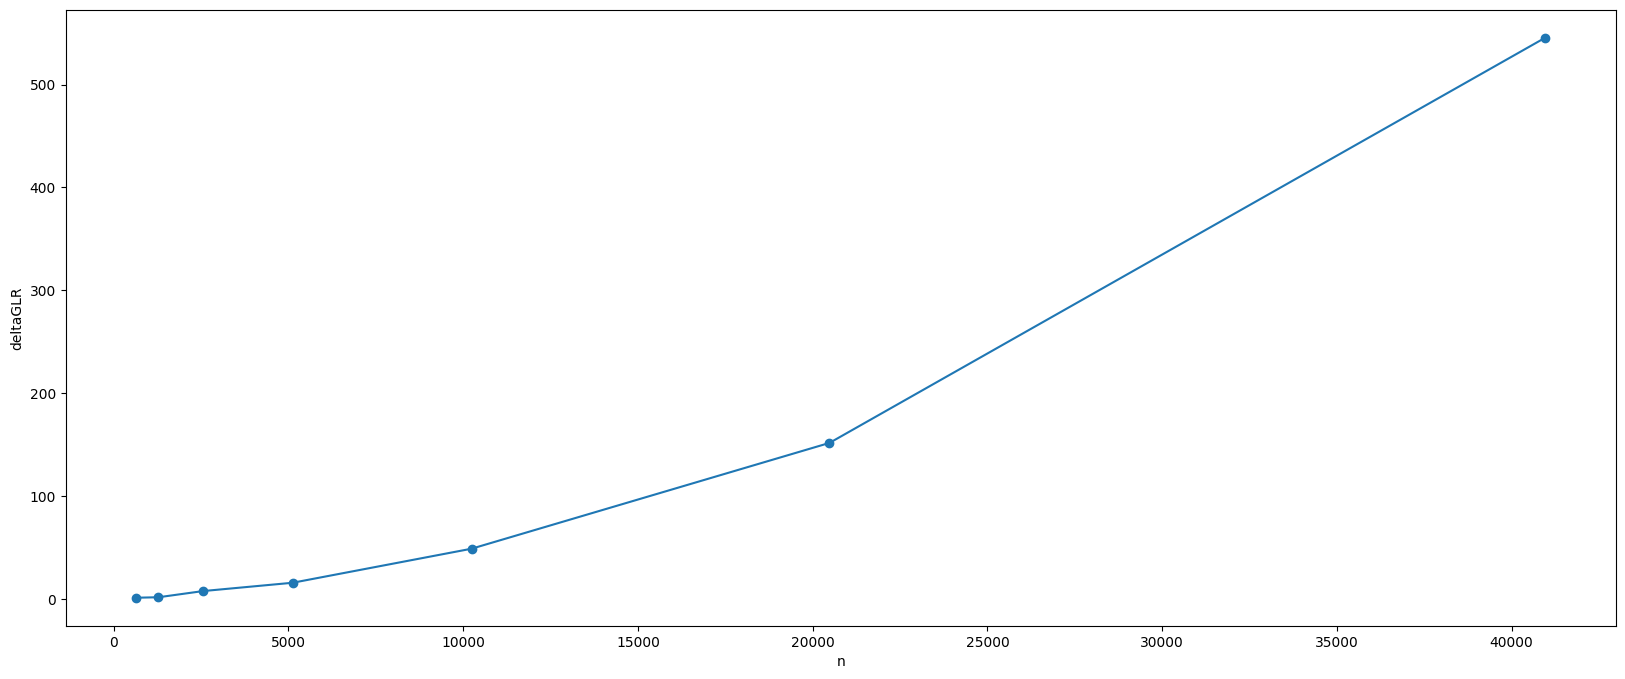

In [121]:
plot_column(dexpnode_ten, ["deltaGLR"])

# Double Experiment (EXP3)